### DATASET OBTAINED FROM
### https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Read the dataset
data = pd.read_csv("nid.csv")


# Separate features and target variable
X_ini = data.drop(columns=['class']) 
y_ini = data['class']


In [4]:
label_counts = data['class'].value_counts()

print(label_counts)



class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [7]:
# Apply Label Encoding to categorical features
le = LabelEncoder()
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    X_ini[col] = le.fit_transform(X_ini[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ini, y_ini, test_size=0.2, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Naive Bayes Metrics:
Accuracy: 0.5572534232982734
Precision: 0.6725546098501707
Recall: 0.5294291912884388
F1 Score: 0.42018686760925167


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro')
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_f1 = f1_score(y_test, dt_predictions, average='macro')

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)


Decision Tree Metrics:
Accuracy: 0.9962294105973407
Precision: 0.9962272878220029
Recall: 0.9962029629934172
F1 Score: 0.996215085726385


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest Metrics:
Accuracy: 0.9974201230402858
Precision: 0.9974728111298803
Recall: 0.9973493084293036
F1 Score: 0.9974100662537053


In [11]:
from sklearn.ensemble import ExtraTreesClassifier

# Train the Extra Trees classifier
et_classifier = ExtraTreesClassifier()
et_classifier.fit(X_train, y_train)

# Predictions
et_predictions = et_classifier.predict(X_test)

# Evaluate the model
et_accuracy = accuracy_score(y_test, et_predictions)
et_precision = precision_score(y_test, et_predictions, average='macro')
et_recall = recall_score(y_test, et_predictions, average='macro')
et_f1 = f1_score(y_test, et_predictions, average='macro')

print("Extra Trees Metrics:")
print("Accuracy:", et_accuracy)
print("Precision:", et_precision)
print("Recall:", et_recall)
print("F1 Score:", et_f1)


Extra Trees Metrics:
Accuracy: 0.9972216709664616
Precision: 0.9972607681647787
Recall: 0.9971623226402235
F1 Score: 0.9972109097211811


In [12]:
from xgboost import XGBClassifier

y_train = y_train.map({'normal': 0, 'anomaly': 1})
y_test = y_test.map({'normal': 0, 'anomaly': 1})

# Train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
xgb_recall = recall_score(y_test, xgb_predictions, average='macro')
xgb_f1 = f1_score(y_test, xgb_predictions, average='macro')

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


XGBoost Metrics:
Accuracy: 0.9984123834094066
Precision: 0.9984309835170639
Recall: 0.9983819601803285
F1 Score: 0.9984063127599349


In [13]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of all classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('et', et_classifier),
    ('xgb', xgb_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluate the model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions, average='macro')
ensemble_recall = recall_score(y_test, ensemble_predictions, average='macro')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='macro')

print("Ensemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Metrics:
Accuracy: 0.9980154792617583
Precision: 0.9980835542507893
Recall: 0.9979346964979499
F1 Score: 0.9980076937261844


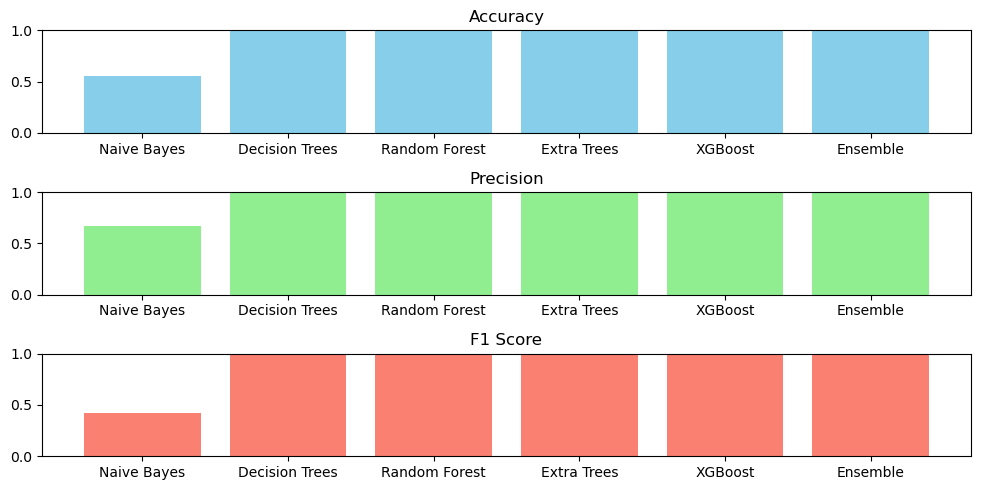

In [15]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [nb_accuracy, dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [nb_precision, dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
f1_scores = [nb_f1, dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

plt.subplot(3, 1, 2)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(3, 1, 3)
plt.bar(models, f1_scores, color='salmon')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


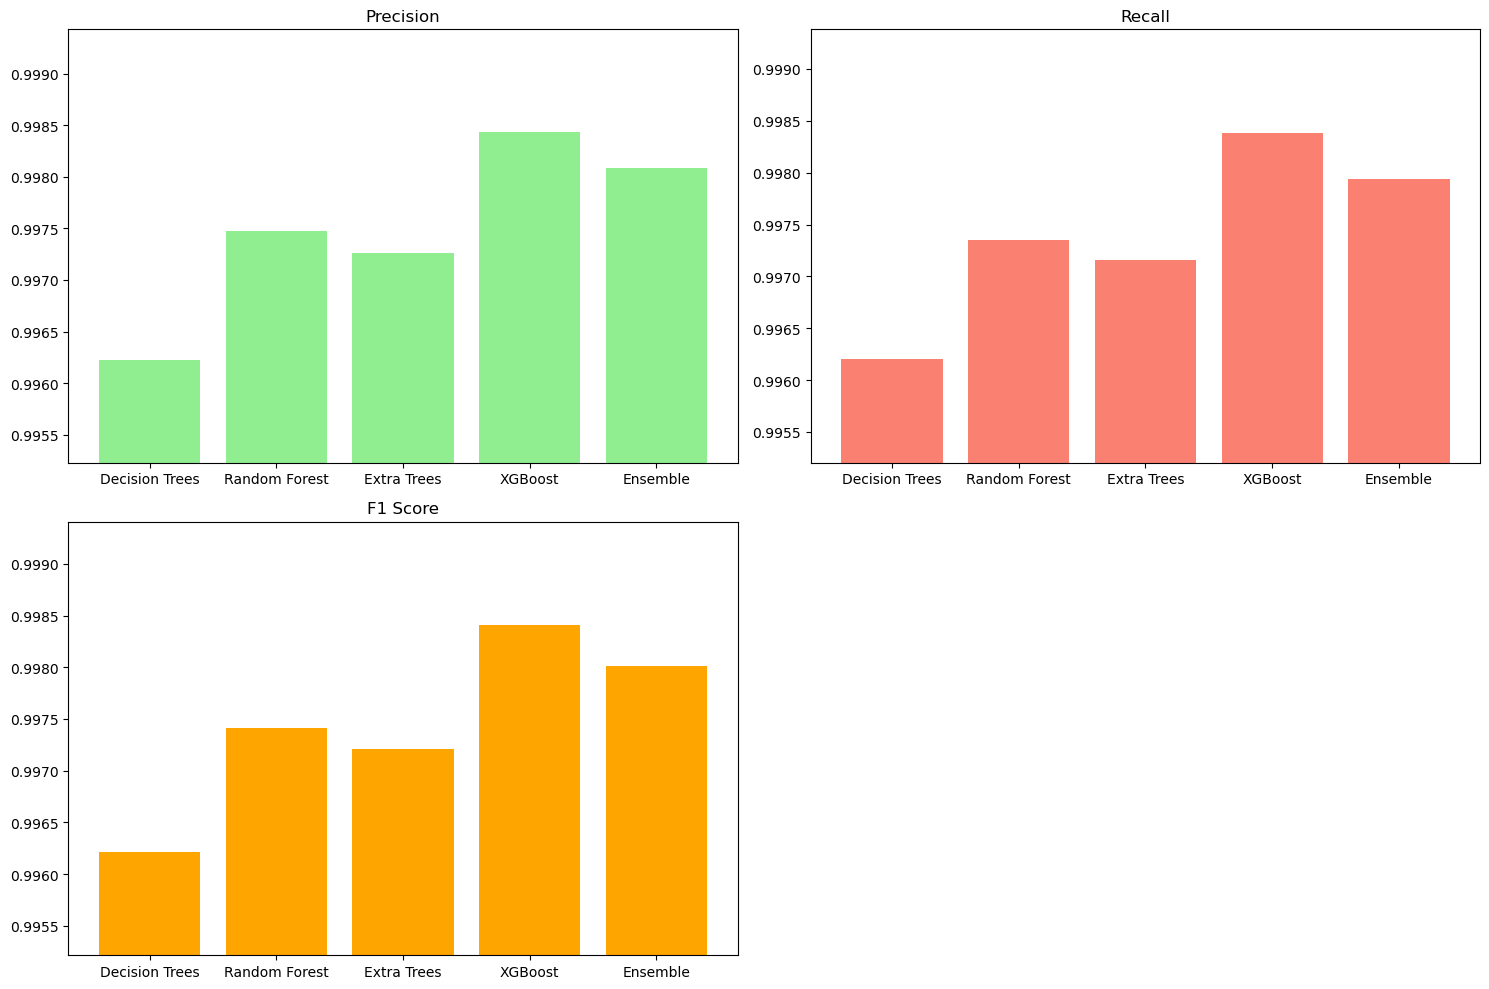

In [16]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
recalls = [dt_recall, rf_recall, et_recall, xgb_recall, ensemble_recall]
f1_scores = [dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(15, 10))



plt.subplot(2, 2, 1)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(min(precisions) - 0.001, max(precisions) + 0.001)

plt.subplot(2, 2, 2)
plt.bar(models, recalls, color='salmon')
plt.title('Recall')
plt.ylim(min(recalls) - 0.001, max(recalls) + 0.001)

plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color='orange')
plt.title('F1 Score')
plt.ylim(min(f1_scores) - 0.001, max(f1_scores) + 0.001)

plt.tight_layout()
plt.show()
